In [207]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
%matplotlib notebook

### Quantum Walk

In [187]:
t = 40       #number of steps
N = 50*2 + 1

C = 1/np.sqrt(2) *np.array([[1,1],
                         [1,-1]])
c0 = np.array([1,0])
c1 = np.array([0,1])

$S = | 0 \rangle_c \langle 0 | \otimes \sum_i | i+1 \rangle_p \langle i | +  | 1 \rangle_c \langle 1 | \otimes \sum_i | i-1 \rangle_p \langle i |$

In [89]:
eyePlus = np.roll(np.eye(N), 1, axis=0)
eyeMinus = np.roll(np.eye(N), -1, axis=0)
S = np.kron(eyePlus, np.outer(c0, c0)) + np.kron(eyeMinus, np.outer(c1, c1))

$U = S \left( C \otimes \bf I \right)$

In [90]:
U = S.dot(np.kron(C, np.eye(N)))

$| \psi_0 \rangle = \frac{1}{\sqrt{2}} \left( | 0 \rangle + | 1 \rangle\right) \otimes | 51 \rangle$

In [91]:
psi0 = np.kron(C, np.eye(N)).dot(np.kron(c0, np.eye(N)[:,51]))
psi40 = np.linalg.matrix_power(U, t).dot(psi0)

$P_i = \mathbf{I} \otimes | i \rangle \langle i |$

$prob = \langle \psi | P_i | \psi \rangle$

In [499]:
prob_q = np.empty(N)
base = np.eye(N)
for i in range(N):
    posn = base[:,i]
    P_i = np.kron(np.eye(2), np.outer(posn,posn))
    proj = P_i.dot(psi40)
    prob_q[i] = proj.conjugate().dot(proj).real


### Random Walk

In [497]:
t_test = 40

possible_positions = np.arange(int(-N/2), int(N/2)+1, 1)
pos = deepcopy(possible_positions)
initial = 51
walks = np.empty(t_test)
prob_c = np.zeros(N)
for i in range(t_test):
    if np.random.random() > 0.5:
        pos = np.roll(pos, -1)
    else:
        pos = np.roll(pos, 1)
    walks[i] = pos[initial]
states, counts = np.unique(walks, return_counts=True)
visited_states = np.array([np.where(possible_positions == i) for i in states.astype(int)]).flatten()
prob_c[visited_states] = counts
prob_c = prob_c/(t_test)

### Comparative

<IPython.core.display.Javascript object>


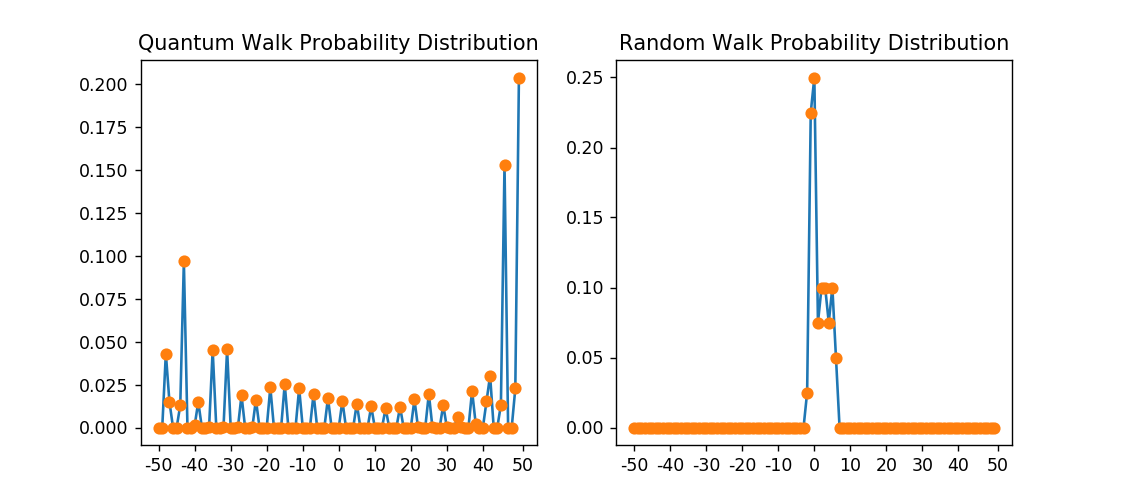

In [498]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,4))
ax1.plot(np.arange(N), prob_q)
ax1.plot(np.arange(N), prob_q, 'o')
ax1.set_title("Quantum Walk Probability Distribution")

ax2.plot(np.arange(N), prob_c)
ax2.plot(np.arange(N), prob_c, 'o')
ax2.set_title("Random Walk Probability Distribution")

loc = np.arange(0, N+1, N/10).astype(int)
ax1.set_xticks(loc)
ax2.set_xticks(loc)
ax1.set_xticklabels(np.arange(-N/2, N/2 + 1, N / 10).astype(int))
ax2.set_xticklabels(np.arange(-N/2, N/2 + 1, N / 10).astype(int))

plt.show()

#### O resultado final foi diferente para ambos os casos como era esperado pois o passeio quântico se espalha muito rápido, na ordem de $O(t)$, enquanto que o passeio aleatório demora mais a se espalhar, na ordem de $O(\sqrt{t})$